{{0, 62, 28, 40, 71}, {62, 0, 88, 45, 70}, {28, 88, 0, 18, 95}, {40, 45, 18, 0, 84}, 
 
>   {71, 70, 95, 84, 0}}
{232, {1, 5, 2, 4, 3, 1}}
Graph[<5>, <10>]
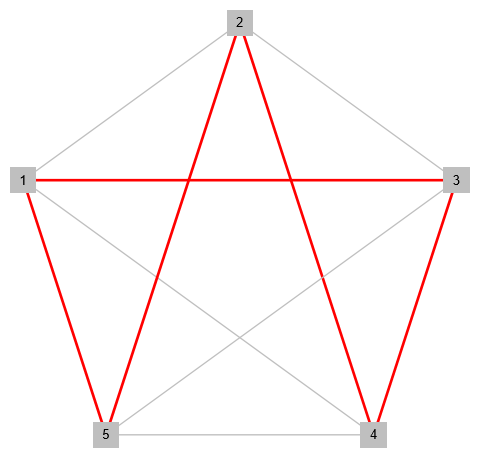

In [1]:
g = RandomGraph[WattsStrogatzGraphDistribution[5, 0.2]];
edges = EdgeList[g];
weight = RandomInteger[{10, 100}, Length[edges]];
graph = Graph[g, EdgeWeight -> weight, PlotTheme -> "ClassicDiagram"];

matrix = Normal[WeightedAdjacencyMatrix[graph]]

p = FindShortestTour[graph]

path = UndirectedEdge @@@ Partition[Append[p[[2]], First[p[[2]]]], 2, 1];
HighlightGraph[
  graph,
  Style[path, Red, Thick]
]

nodes = VertexList[graph];

In [10]:
permutation[graph_] := Module[{cycle, node, list, list1, n, added, position},
  cycle = {nodes[[1]]};
  Do[
    node = cycle[[i]];
    list = matrix[[node]];
    list1 = Sort[Select[list, # != 0 &]];
    n = Length[list];
    added = False;
    For[j = 1, j <= n && !added, j++,
      position = First[FirstPosition[list, list1[[j]]]];
      If[FreeQ[cycle, position],
        cycle = AppendTo[cycle, position];
        added = True
      ];
    ],
    {i, Length[nodes] - 1}
  ];
  cycle
]

weightPath[cycle_] := Sum[matrix[[cycle[[i]], cycle[[i + 1]]]], {i, Length[cycle] - 1}];

In [12]:
{weightPath[Join[permutation[graph], {nodes[[1]]}]], Join[permutation[graph], {nodes[[1]]}]}

{232, {1, 3, 4, 2, 5, 1}}